In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import yfinance as yf


df = pd.read_csv(r"G:\archive\Financials.csv")
# Load historical price data for selected assets
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']  # Example tickers
data = yf.download(tickers, start='2020-01-01', end='2024-01-01')['Adj Close']

# Ensure the dataset is formatted correctly
print(df.head())  # Display the first few rows to verify structure
print(df.dtypes)
for col in df.columns[1:]:  # Skip the first column
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for any NaN values after conversion
print(df.isna().sum())

# Drop rows with NaN values (if any)
df.dropna(inplace=True)
assets = df.columns[1:]  # Adjust if necessary, e.g., skip date column
returns = df[assets].pct_change().dropna()

returns = data.pct_change().dropna()
print(returns.head())




[*********************100%***********************]  5 of 5 completed

               Country     Product   Discount Band   Units Sold   \
0  Government   Canada   Carretera            None    $1,618.50    
1  Government  Germany   Carretera            None    $1,321.00    
2   Midmarket   France   Carretera            None    $2,178.00    
3   Midmarket  Germany   Carretera            None      $888.00    
4   Midmarket   Mexico   Carretera            None    $2,470.00    

   Manufacturing Price   Sale Price   Gross Sales   Discounts        Sales   \
0                $3.00       $20.00    $32,370.00               $32,370.00    
1                $3.00       $20.00    $26,420.00               $26,420.00    
2                $3.00       $15.00    $32,670.00               $32,670.00    
3                $3.00       $15.00    $13,320.00               $13,320.00    
4                $3.00       $15.00    $37,050.00               $37,050.00    

         COGS       Profit       Date  Month Number  Month Name   Year  
0  $16,185.00   $16,185.00   1/1/2014      

In [37]:
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    returns = np.sum(mean_returns * weights) * 252  # Annualized returns
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    sharpe_ratio = (returns - risk_free_rate) / std
    return std, returns, sharpe_ratio

# Objective function to minimize (negative Sharpe Ratio)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    std, returns, sharpe_ratio = portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)
    return -sharpe_ratio

# Constraints and bounds for weights (sum to 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(assets)))

# Initial guess (equal distribution)
num_assets = len(assets)
init_guess = num_assets * [1. / num_assets,]
# Optimize portfolio
opt_results = minimize(negative_sharpe_ratio, init_guess, args=(mean_returns, cov_matrix, risk_free_rate),
                       method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = opt_results.x
print("Optimal Weights:", optimal_weights)

Optimal Weights: [0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]


In [44]:
def sharpe_ratio(return_series, risk_free_rate=0.01):
    mean_return = return_series.mean() * 252  # Annualized return
    std_dev = return_series.std() * np.sqrt(252)  # Annualized standard deviation
    return (mean_return - risk_free_rate) / std_dev

In [48]:
def sortino_ratio(return_series, risk_free_rate=0.01):
    mean_return = return_series.mean() * 252  # Annualized return
    downside_returns = return_series[return_series < 0]
    downside_deviation = np.sqrt(np.mean(downside_returns**2)) * np.sqrt(252)  # Annualized downside deviation
    return (mean_return - risk_free_rate) / downside_deviation
    # Calculate portfolio returns (equal-weighted)
portfolio_returns = returns.mean(axis=1)

# Calculate Sharpe and Sortino Ratios
sharpe = sharpe_ratio(portfolio_returns)
sortino = sortino_ratio(portfolio_returns)

print(f"Sharpe Ratio: {sharpe:.4f}")
print(f"Sortino Ratio: {sortino:.4f}")

Sharpe Ratio: 1.0300
Sortino Ratio: 0.9818


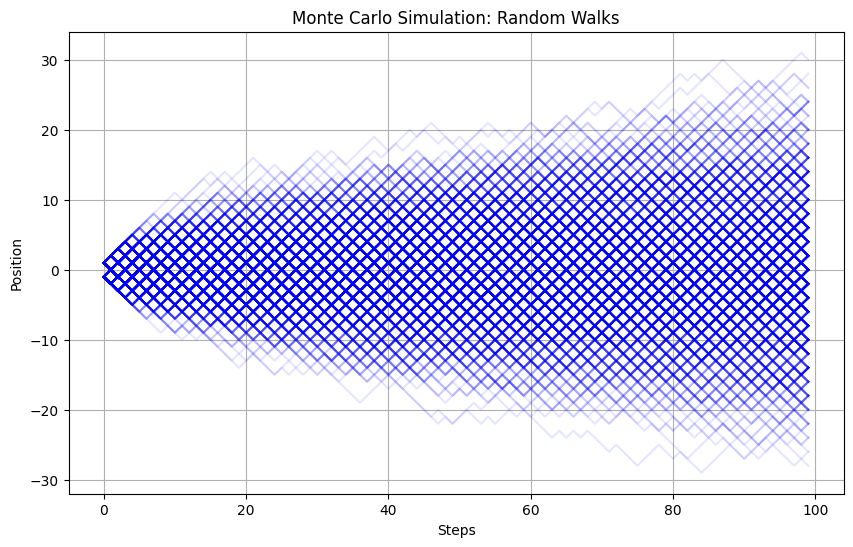

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_simulations = 1000
num_steps = 100

# Generate random walks
all_walks = np.zeros((num_simulations, num_steps))
for i in range(num_simulations):
    steps = np.random.choice([-1, 1], size=num_steps)  # Random steps
    all_walks[i] = np.cumsum(steps)  # Cumulative sum to simulate the walk

# Plotting
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(all_walks[i], color='blue', alpha=0.1)  # Plot each walk with low opacity

plt.title('Monte Carlo Simulation: Random Walks')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.grid()
plt.show()  # Ensure this is called to display the plot

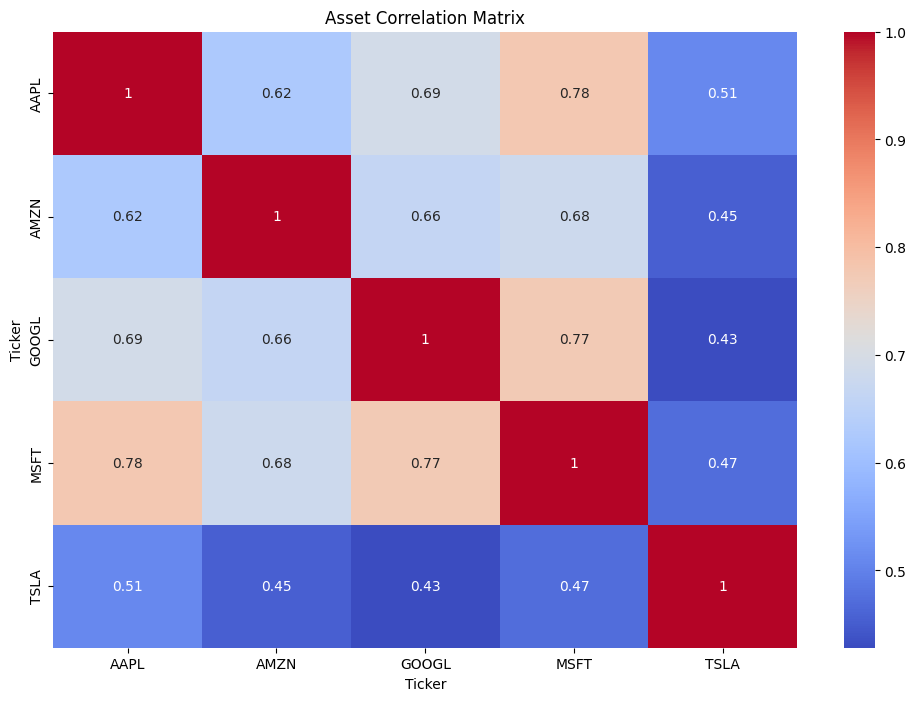

In [43]:
# Correlation Matrix
correlation_matrix = returns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Asset Correlation Matrix")
plt.show()

















